In [9]:
import random
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
from QAP_heuristic import QAP_heuristic

In [34]:
class TabuSearch(QAP_heuristic):
    def __init__(self, w, d, tabu_size=100) -> None:
        super().__init__(w, d)
        self.tabu_size = tabu_size

    # auxiliary methods
    def generate_neighbors(self, solution):
        neighbors = []
        for i in range(len(solution)):
            for j in range(i+1, len(solution)):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = solution[j], solution[i]
                neighbors.append(neighbor)
        return neighbors

    # implements the solve method via the Tabu Search algorithm
    def solve(self, n_iter=1000):

        best_solution = self.greedy_qap()
        best_cost = self.cost(best_solution)
        
        current_solution = best_solution
        current_cost = best_cost
        
        tabu_list = []
        cost_hist = [current_cost] # using this for debugging

        for _ in tqdm(range(n_iter)):
            neighbors = self.generate_neighbors(current_solution)
            best_neighbor = None
            best_neighbor_cost = float('inf')
            
            for neighbor in neighbors:
                if neighbor not in tabu_list:
                    cost = self.cost(neighbor)
                    if cost < best_neighbor_cost:
                        best_neighbor_cost = cost
                        best_neighbor = neighbor
            
            if best_neighbor:
                tabu_list.append(best_neighbor)
                if len(tabu_list) > self.tabu_size:
                    tabu_list.pop(0)
                
                current_solution = best_neighbor
                current_cost = best_neighbor_cost
                
                if current_cost < best_cost:
                    best_cost = current_cost
                    best_solution = current_solution
                    cost_hist.append(best_cost)

        return best_solution, best_cost, cost_hist

    # greedy constructive heuristic to formulate an initial solution
    def greedy_qap(self):
        F, D = self.W.copy(), self.D.copy()
        
        num_facilities = F.shape[0]
        remaining_facilities = set(range(num_facilities))
        remaining_locations = set(range(num_facilities))
        perm = [-1 for _ in range(num_facilities)]
        
        for i in range(num_facilities):
            best_cost = float('inf')
            best_facility, best_location = -1, -1
            
            for f in remaining_facilities:
                for l in remaining_locations:
                    current_cost = self.cost(perm)
                    
                    if current_cost < best_cost:
                        best_cost = current_cost
                        best_facility, best_location = f, l
                        
            perm[best_location] = best_facility
            remaining_facilities.remove(best_facility)
            remaining_locations.remove(best_location)
        
        return perm

In [30]:
# set up params for plots
SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=SMALL)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL) # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=SMALL)       # controls default text sizes

In [35]:
# for managing file opening and closing
def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

# Using raw string for the path
file_path = '../QAPInstances/tai30b.dat'  
file_it = iter(read_integers(file_path))

# Number of points
n = next(file_it)

# Distance between locations
w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
d = np.array([[next(file_it) for j in range(n)] for i in range(n)])


tabu_search = TabuSearch(w, d, tabu_size=100)
solution, cost, cost_hist = tabu_search.solve(10_000)
print(solution)
print(cost)

100%|██████████| 10000/10000 [02:06<00:00, 79.10it/s]

[7, 3, 10, 28, 8, 25, 9, 4, 13, 5, 27, 11, 2, 14, 18, 29, 21, 0, 1, 16, 15, 19, 17, 20, 12, 23, 6, 22, 26, 24]
757071126


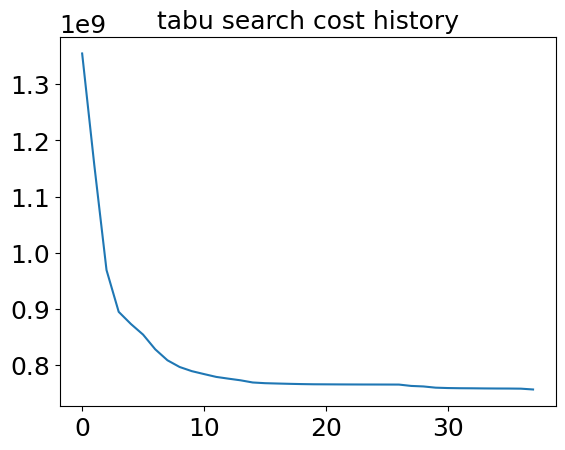

In [37]:
# just to verify that it works
plt.plot(cost_hist)
plt.title('tabu search cost history')
plt.show()